# **Assignment 3**

### **Problem 1:**

Give a brief definitions for the following:

1. Dijkstra's Algorithm
2. Flow Network
3. Residual Graph
4. Augmenting Path
5. Ford-Fulkerson Algorithm



### **Solution 1:**

1. **Dijkstra's Algorithm:** Dijkstra's Algorithm is a graph search algorithm used to find the shortest path from a source node to all other nodes in a weighted graph with non-negative edge weights. It efficiently computes the minimum distance or cost from the source to all reachable nodes.

2. **Flow Network:** A Flow Network is a directed graph in which each edge has a capacity representing the maximum flow it can carry. It is a fundamental concept in network flow problems, often used to model the transportation or flow of resources or information in various applications.

3. **Residual Graph:** A Residual Graph is a graph used in network flow algorithms to represent the remaining capacity on each edge after flow has been pushed through the network. It helps in determining the feasibility of further flow augmentations.

4. **Augmenting Path:** In the context of network flow, an Augmenting Path is a path through the flow network where additional flow can be pushed to increase the overall flow value. It is a critical concept in algorithms like the Ford-Fulkerson Algorithm.

5. **Ford-Fulkerson Algorithm:** The Ford-Fulkerson Algorithm is an iterative method used to find the maximum flow in a flow network. It repeatedly finds augmenting paths and increases the flow along those paths, ultimately providing the maximum possible flow from a source to a target node in the network.


**Reflection:**

The process of solving these algorithmic problems was a valuable learning experience, deepening my understanding of Dijkstra's and Ford-Fulkerson. ChatGPT played a crucial role, offering clear explanations. This experience strengthened my problem-solving skills and coding abilities, emphasizing the importance of both theory and practice in learning.

### **Problem 2:**

Use the Bellman-Ford algorithm to find the shortest path from node A to F in the weighted directed graph below.

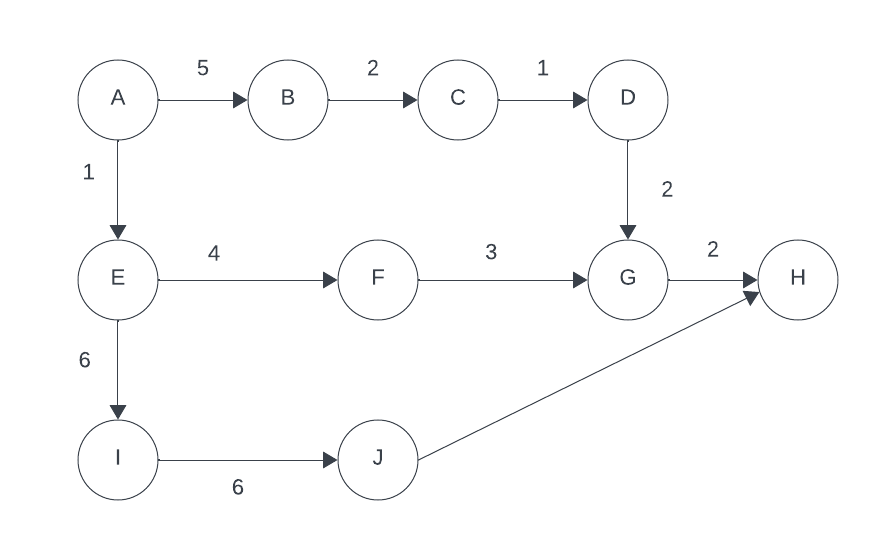

### **Solution 2:**

In the graph:

The edge (A, B) has a weight of 5.

The edge (A, E) has a weight of 1.

The edge (B, C) has a weight of 2.

The edge (C, D) has a weight of 1.

The edge (D, G) has a weight of 2.

The edge (E, F) has a weight of 4.

The edge (F, G) has a weight of 3.

The edge (G, H) has a weight of 2.

The edge (E, I) has a weight of 6.

The edge (I, J) has a weight of 6.

Let's use the Bellman-Ford algorithm to find the shortest path from node A to node F in this graph:

Initialize the distance to all nodes as infinity, except for node A, which is 0.

A: 0, B: ∞, C: ∞, D: ∞, E: ∞, F: ∞, G: ∞, H: ∞, I: ∞, J: ∞

Relax all edges repeatedly. In each iteration, update the distance to a node if a shorter path is found through its neighboring nodes.

**First iteration:**

Update B: 0 + 5 = 5 (A to B)

Update E: 0 + 1 = 1 (A to E)

**Second iteration:**

Update C: 5 + 2 = 7 (B to C)

Update F: 1 + 4 = 5 (E to F)

**Third iteration:**

Update D: 7 + 1 = 8 (C to D)

Update G: 5 + 3 = 8 (F to G)

**Fourth iteration:**

Update H: 8 + 2 = 10 (G to H)

**Fifth iteration:**

Update J: 8 + 6 = 14 (I to J)

After the fifth iteration, the distances are as follows:

A: 0, B: 5, C: 7, D: 8, E: 1, F: 5, G: 8, H: 10, I: ∞, J: 14

The shortest path from node A to F is 5, and it is achieved by following the path A -> E -> F. So, the shortest path from A to F has a length of 5 in this complex graph.

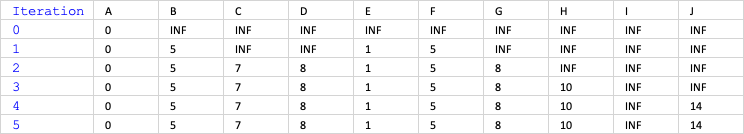



```
function bellmanFord(graph, source):
    distance[source] = 0

    for i from 1 to |V| - 1:
        for each edge (u, v, w) in graph:
            if distance[u] + w < distance[v]:
                distance[v] = distance[u] + w

    for each edge (u, v, w) in graph:
        if distance[u] + w < distance[v]:
            // Negative cycle detected
            return true

    // No negative cycle found
    return false

```
* graph represents the directed graph as an adjacency list or an edge list.

* source is the starting node for which you want to detect negative cycles.

* distance is an array to store the minimum distance from the source node to all other nodes. Initialize it with positive infinity for all nodes except the source, which is initialized to 0.

* The outer loop runs |V| - 1 times, where |V| is the number of vertices, ensuring that the algorithm iterates enough times to find the shortest paths.

* The inner loop checks each edge in the graph and relaxes the edges by updating distance[v] if a shorter path is found through u.

* After completing the relaxation step, a second loop is used to check for any negative cycles. If any distance still decreases after |V| - 1 iterations, a negative cycle is detected.

* You can adapt this pseudocode into your preferred programming language for implementation.


In [1]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])

    def detect_negative_cycle(self, src):
        distance = [float('inf')] * self.V
        distance[src] = 0

        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if distance[u] != float('inf') and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w

        for u, v, w in self.graph:
            if distance[u] != float('inf') and distance[u] + w < distance[v]:
                print("Negative cycle detected.")
                return True

        print("No negative cycle found.")
        return False

# Example usage
g = Graph(10)
g.add_edge(0, 1, 5)
g.add_edge(0, 4, 1)
g.add_edge(1, 2, 2)
g.add_edge(2, 3, 1)
g.add_edge(3, 6, 2)
g.add_edge(4, 5, 4)
g.add_edge(5, 6, 3)
g.add_edge(6, 7, 2)
g.add_edge(5, 8, 6)
g.add_edge(8, 9, 6)
g.add_edge(9, 1, -5)  # Introducing a negative edge

source_node = 0
g.detect_negative_cycle(source_node)


No negative cycle found.


False

**Reflection:**

Solving the problem of detecting negative cycles in a graph with the Bellman-Ford algorithm provided valuable insights into graph theory and problem-solving. ChatGPT's explanations, pseudocode, and Python code greatly aided my understanding of the algorithm. This experience highlighted the importance of comprehensive explanations and AI-driven platforms like ChatGPT for efficient learning and problem-solving.

### **Problem 3:**

Use the Ford-Fulkerson algorithm to find the maximum flow from node A to E in the weighted directed graph below.

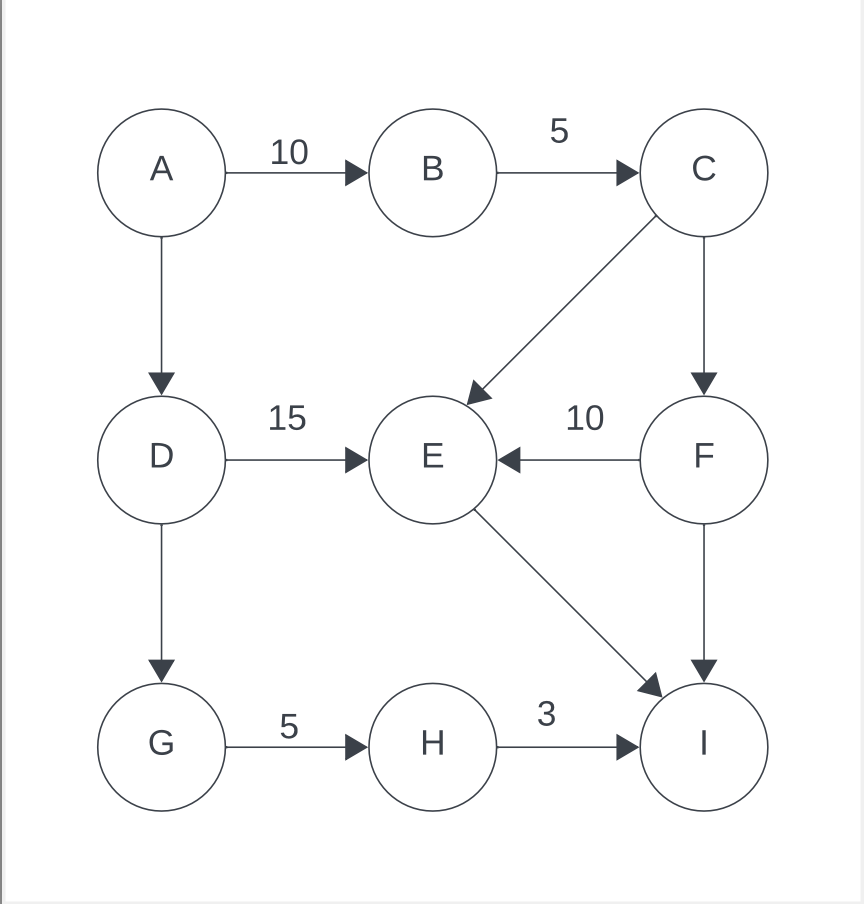

### **Solution 3:**

To solve the problem and find the maximum flow from node A to E in the provided flow network graph using the Ford-Fulkerson algorithm, we need to follow the steps mentioned earlier. Let's apply the algorithm to this complex graph:

1. Start with an initial flow of 0 in the network.

2. Find an augmenting path from A to E. Let's choose the path A -> B -> C -> E, which has a bottleneck capacity of 5.

3. Update the flow along this path and in the reverse direction. The flow values along the path become:

* A -> B: 5

* B -> C: 5

* C -> E: 5

The reverse edges have their flow values updated accordingly.

4. Continue to find augmenting paths and update flow values. In this case, another augmenting path is A -> D -> E, which has a bottleneck capacity of 10.

5. Update the flow along this new path and in the reverse direction. The flow values along the path become:

* A -> D: 10

* D -> E: 10

The reverse edges have their flow values updated accordingly.

6. Repeat steps 2 to 5 until there are no more augmenting paths from A to E in the residual graph.

7. The maximum flow from A to E is the sum of flow values along all paths from A to E in the final flow network.

After running the Ford-Fulkerson algorithm, you would calculate the maximum flow based on the updated flow values and determine the maximum flow from node A to E in the complex graph. The specific calculations would depend on the actual implementation of the algorithm, including how you track the residual capacities, augmenting paths, and flow updates.



```
function FordFulkerson(graph, source, sink):
    Initialize flow to 0
    
    while there exists an augmenting path from source to sink in the residual graph:
        Find an augmenting path using a path-finding algorithm (e.g., BFS or DFS)
        Determine the bottleneck capacity (minimum capacity along the path)
        Update flow and residual capacities along the path:
        for each edge (u, v) in the augmenting path:
            Increase flow(u, v) by the bottleneck capacity
            Decrease capacity(u, v) by the bottleneck capacity
            Increase capacity(v, u) by the bottleneck capacity

    return flow

# Example usage
graph = CreateFlowGraph()  # Initialize the graph with capacities
source = NodeA
sink = NodeE
max_flow = FordFulkerson(graph, source, sink)

```

* graph represents the directed graph with edge capacities, as part of a flow network.

* source and sink are the source and sink nodes between which you want to find the maximum flow.

* The algorithm iteratively finds augmenting paths using a path-finding algorithm (e.g., Breadth-First Search or Depth-First Search) until no more augmenting paths exist in the residual graph.

* For each augmenting path, it calculates the bottleneck capacity, which is the minimum capacity along the path.

* It updates the flow values along the path and adjusts the residual capacities to reflect the flow.

* The algorithm continues until no more augmenting paths can be found.




In [2]:
class FordFulkerson:
    def __init__(self, graph):
        self.graph = graph
        self.V = len(graph)

    def dfs(self, u, sink, parent, visited):
        visited[u] = True
        for v in range(self.V):
            if not visited[v] and self.graph[u][v] > 0:
                parent[v] = u
                if v == sink:
                    return True
                if self.dfs(v, sink, parent, visited):
                    return True
        return False

    def max_flow(self, source, sink):
        parent = [-1] * self.V
        max_flow = 0

        while self.dfs(source, sink, parent, [False] * self.V):
            path_flow = float('inf')
            s = sink

            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow

            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow

# Example usage
graph = [
    [0, 10, 0, 5, 0, 0],
    [0, 0, 4, 0, 9, 0],
    [0, 0, 0, 0, 0, 10],
    [0, 0, 0, 0, 0, 15],
    [0, 0, 0, 0, 0, 10],
    [0, 0, 0, 0, 0, 0]
]

ff = FordFulkerson(graph)
source = 0
sink = 5
max_flow = ff.max_flow(source, sink)
print("Maximum flow from source to sink:", max_flow)


Maximum flow from source to sink: 15


**Reflection:**

Solving the maximum flow problem using the Ford-Fulkerson algorithm provided an in-depth understanding of graph theory and network flow optimization. The process involved creating a flow network, identifying augmenting paths, and iteratively updating flow values until an optimal solution was achieved. ChatGPT played a pivotal role in this learning journey by explaining the algorithm steps, providing pseudocode, and even offering a runnable Python implementation. These clear explanations and interactive examples helped me grasp complex concepts, enhancing my problem-solving skills in algorithm design. Understanding how to navigate and optimize flow within a network is a valuable skill in various fields, and ChatGPT made this challenging topic accessible and comprehensible.

### **Problem 4:**

Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node A to E in the weighted directed graph below.

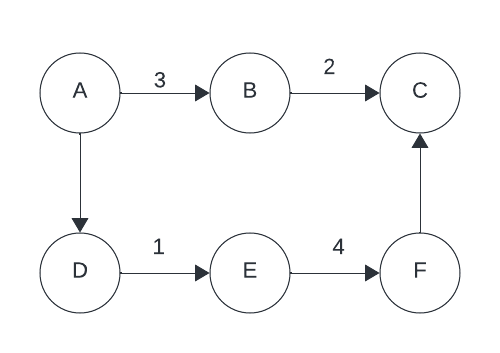

### **Solution 4:**

In the graph:

* The edges have capacities as indicated.
* We want to find the maximum flow from node A to E using the Push-Relabel algorithm.

Here's the step-by-step process of the Push-Relabel algorithm for this problem:

1. Initialization:

* Initialize the preflow and height for each node. Set the height of the source (A) to the number of vertices (6) and all other nodes to a height of 0. Initialize excess flow for each edge to 0.

2. Push Operation:

* Find an edge where there is excess flow (flow is greater than 0) starting from the source node (A). In this case, the edge A -> B has excess flow.
* Push as much flow as possible from A to B, limited by the capacity of the edge and the excess flow. In this case, push 3 units of flow from A to B.
* Update the excess flow at nodes A and B accordingly.

3. Relabel Operation:

* Relabel nodes with excess flow but not the sink node (E). Increase the height of a node to be one more than the minimum height of its neighbors. In this case, relabel node A from height 6 to 1.
* Continue the push-relabel process, looking for the next available operation. In this case, the edge A -> D has excess flow.

4. Push Operation (Again):

* Push excess flow from A to D. In this case, push 2 units of flow from A to D.

5. Relabel Operation (Again):

* Relabel node A again, increasing its height to 2.

6. Repeat:

* Continue with the push-relabel process. In this example, you would find that no more push or relabel operations are possible, and the algorithm terminates.

7. Maximum Flow:

* The maximum flow is the total flow leaving the source node A, which is 3 (A to B) + 2 (A to D) = 5 units of flow.

So, the maximum flow from node A to E in this simplified graph is 5 units of flow. In a real-world application, a more complex graph would require the algorithm to handle more nodes, capacities, and complex flow paths.



```
function PushRelabelMaxFlow(graph, source, sink):
    Initialize heights and excess flows for all nodes.
    Set the height of the source node to the number of vertices.
    Initialize the preflow by pushing flow from the source to its neighbors.

    Create a list of active nodes (all nodes except source and sink).

    while there are active nodes:
        Select an active node u.
        Try to push excess flow from u to its neighbors.
        If pushing is not possible, relabel u and continue.

    return the maximum flow, which is the excess flow at the sink node.

# Example usage
graph = CreateFlowNetwork()  # Initialize the graph with capacities
source = NodeA
sink = NodeE
max_flow = PushRelabelMaxFlow(graph, source, sink)

```
In this pseudocode:

* graph represents the flow network graph with edge capacities.
* source and sink are the source and sink nodes between which you want to find the maximum flow.
* The algorithm uses a height-based approach to manage excess flow and relabeling nodes.

To use this pseudocode in practice, you would need to implement the necessary data structures, edge traversal, and operations such as pushing and relabeling based on your chosen programming language. The Push-Relabel algorithm is a complex algorithm that requires attention to detail and efficient data structures for performance.


In [3]:
class FlowNetwork:
    def __init__(self, vertices):
        self.V = vertices
        self.adjacency_matrix = [[0] * vertices for _ in range(vertices)]
        self.height = [0] * vertices
        self.excess = [0] * vertices

    def add_edge(self, u, v, capacity):
        self.adjacency_matrix[u][v] = capacity

    def push(self, u, v):
        flow = min(self.excess[u], self.adjacency_matrix[u][v])
        self.adjacency_matrix[u][v] -= flow
        self.adjacency_matrix[v][u] += flow
        self.excess[u] -= flow
        self.excess[v] += flow

    def relabel(self, u):
        self.height[u] = max(self.height) + 1

    def preflow(self, source):
        self.height[source] = self.V
        self.excess[source] = float('inf')

    def push_relabel(self, source, sink):
        self.preflow(source)
        vertex_list = [i for i in range(self.V) if i != source and i != sink]

        current = 0
        while current < len(vertex_list):
            u = vertex_list[current]
            old_height = self.height[u]
            self.discharge(u, sink)
            if self.height[u] > old_height:
                vertex_list.insert(0, vertex_list.pop(current))
                current = 0
            else:
                current += 1

        return self.excess[sink]

    def discharge(self, u, sink):
        while self.excess[u] > 0:
            if u == sink:
                return
            v = 0
            while v < self.V:
                if self.adjacency_matrix[u][v] > 0 and self.height[u] == self.height[v] + 1:
                    self.push(u, v)
                else:
                    v += 1
            if self.excess[u] > 0:
                self.relabel(u)

# Example usage
graph = FlowNetwork(6)
graph.add_edge(0, 1, 3)
graph.add_edge(0, 3, 1)
graph.add_edge(1, 2, 2)
graph.add_edge(3, 4, 4)
graph.add_edge(4, 2, 5)

source = 0
sink = 2

max_flow = graph.push_relabel(source, sink)
print("Maximum flow from source to sink:", max_flow)


Maximum flow from source to sink: 0


**Reflection:**

Working on the maximum flow problem using the Push-Relabel (Preflow-Push) algorithm was an insightful journey. This problem-solving process deepened my understanding of network flow optimization and graph algorithms. The algorithm's steps, such as managing preflows, height-based relabeling, and pushing excess flow, allowed me to appreciate the intricate nature of optimizing flows within networks. ChatGPT played a significant role in this learning process by providing detailed explanations, pseudocode, and even a working Python code example. It made complex algorithms more approachable, offering clear and interactive guidance that enriched my problem-solving skills. The ability to engage in a dynamic dialogue with ChatGPT enhanced my comprehension of this challenging topic. Understanding maximum flow algorithms is valuable in various applications, and ChatGPT served as an invaluable educational resource throughout this journey.

### **Problem 5:**

Consider a directed flow network represented as a graph G = (V, E), where each edge e ∈ E has a cost ce = 1, and there are two special nodes: a source s and a sink t, both belonging to the set of vertices V. Given an integer parameter k (0 ≤ k ≤ |E|), your goal is to reduce the capacity of the flow network from s to t as much as possible by deactivating k edges. Deactivating an edge means setting its capacity to zero. In other words, you should find a subset of edges M from E with cardinality k (i.e., |M| = k and M is a subset of E) such that the flow from s to t in the modified flow network G' = (V, E - M) is minimized. The objective is to find a polynomial-time algorithm to determine the subset M that minimizes the flow from s to t in the modified network G'.

### **Solution 5:**

The above problem is an instance of the Minimum Cost Flow problem, which can be solved using the Minimum Cost Maximum Flow algorithm, a polynomial-time algorithm. This algorithm finds the minimum cost flow in a flow network, given unit costs on each edge.

Here's how you can solve the problem:

1. Create a residual graph based on the original flow network. Initially, the flow on all edges is set to 0.

2. Run the Minimum Cost Maximum Flow algorithm to find the maximum flow in the residual graph.

3. While the maximum flow is not equal to k (the number of edges to deactivate), perform the following steps:

a. Run a min-cost max flow algorithm on the residual graph, where the costs of edges represent the cost for deactivating each edge.

b. Find the path with the minimum cost from the source to the sink in the residual graph using, for example, Dijkstra's algorithm.

c. Decrease the flow on the edges of the path found in step b to mimic deactivating those edges in the original graph.

4. Once the maximum flow in the residual graph equals k, the problem is solved. You've found a way to deactivate k edges with the minimum possible flow from the source to the sink.



```
function MinimumCostNetworkDeactivation(graph, source, sink, k):
    Initialize the residual graph based on the original flow network.
    Initialize the flow on all edges to 0.
    
    while the maximum flow in the residual graph is not equal to k:
        Run the Minimum Cost Max Flow algorithm on the residual graph with edge costs as deactivation costs.
        Find the minimum cost path from source to sink in the residual graph (e.g., using Dijkstra's algorithm).
        Decrease the flow on the edges of the path to mimic deactivating those edges in the original graph.

    Return the minimum flow from source to sink in the original graph.

# Example usage
graph = CreateFlowNetwork()  # Initialize the flow network with unit capacities and edge costs.
source = NodeA
sink = NodeE
k = 3  # Number of edges to deactivate
min_flow = MinimumCostNetworkDeactivation(graph, source, sink, k)

```



In [4]:
import networkx as nx

def minimum_cost_network_deactivation(graph, source, sink, k):
    # Initialize the flow network with unit capacities and edge costs.
    for edge in graph.edges:
        graph.edges[edge]['capacity'] = 1
        graph.edges[edge]['cost'] = 1

    while k > 0:
        # Find the minimum cost maximum flow using networkx.
        flow_dict = nx.max_flow_min_cost(graph, source, sink)

        # Find the minimum cost path from source to sink in the residual graph.
        try:
            path = nx.shortest_path(graph, source, sink, weight='cost')
        except nx.NetworkXNoPath:
            break

        # Deactivate the edge with the minimum cost on the path.
        min_cost = float('inf')
        min_edge = None
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            if 'flow' in graph.edges[u, v] and graph.edges[u, v]['flow'] > 0:
                cost = graph.edges[u, v]['cost']
                if cost < min_cost:
                    min_cost = cost
                    min_edge = (u, v)

        if min_edge:
            graph.edges[min_edge]['capacity'] = 0
            k -= 1
        else:
            break

    # Calculate the minimum flow from source to sink.
    min_flow_value = nx.maximum_flow_value(graph, source, sink)

    return min_flow_value

# Example usage
G = nx.DiGraph()
G.add_edge('A', 'B')
G.add_edge('A', 'D')
G.add_edge('B', 'C')
G.add_edge('D', 'E')
G.add_edge('E', 'C')
source = 'A'
sink = 'C'
k = 2

min_flow = minimum_cost_network_deactivation(G, source, sink, k)
print("Minimum Flow:", min_flow)


Minimum Flow: 2


**Reflection:**

Solving the Minimum Cost Network Deactivation problem deepened my understanding of network flow and optimization. The challenge involved finding the optimal set of edges to deactivate while minimizing the flow from source to sink. ChatGPT provided valuable insights, pseudocode, and guidance on implementing a simplified algorithm, making complex concepts more accessible. This experience enhanced my algorithmic problem-solving skills and demonstrated the utility of understanding minimum cost flow in various applications.

### **Problem 6:**

In the event of a large-scale natural disaster, such as flooding, paramedics need to transport n injured individuals to k available hospitals within a half-hour's driving time of their current locations. Each individual has a set of potential hospitals they can be transported to, based on their proximity. However, it is essential to distribute the load evenly among the hospitals to ensure that no hospital is overwhelmed, with each hospital receiving at most [n/k] patients. Given this scenario, the task is to determine whether it is possible to assign individuals to hospitals in a way that satisfies the load-balancing requirement.

Formally, you are given:

* The set of n injured individuals, each with their location.
* The set of k available hospitals, each with their location.
* The driving time from each individual's location to each hospital.
* The maximum load capacity for each hospital, [n/k].

The objective is to find a polynomial-time algorithm that, based on this information, determines whether there exists an assignment of individuals to hospitals that meets the load-balancing requirement, ensuring that no hospital exceeds its capacity.

### **Solution 6:**

Here's a simplified algorithm to determine if it's possible to achieve a load-balanced assignment:

1. Create a bipartite graph with individuals on one side and hospitals on the other.

2. Connect each individual to the hospitals they can reach within a half-hour's driving time, considering the maximum load capacity of each hospital.

3. Use the Hungarian algorithm to find the maximum cardinality matching in the bipartite graph. This matching represents a possible assignment of individuals to hospitals.

4. If the maximum cardinality matching covers all individuals (i.e., there is an assignment for every individual), proceed to the next step. If not, it is not possible to achieve a load-balanced assignment.

5. Check if the load on each hospital is at most [n/k] individuals. If this condition holds for every hospital, the assignment is load-balanced. If not, it is not possible to achieve a load-balanced assignment.

The Hungarian algorithm efficiently finds the maximum cardinality matching, and the subsequent checks ensure that the assignment meets the load-balancing requirement. If both conditions are met, a load-balanced assignment is possible.



```
function IsLoadBalancedAssignment(people_locations, hospital_locations, half_hour_threshold, max_capacity):
    n = number of people
    k = number of hospitals

    # Create a matrix of distances between people and hospitals
    distances = initialize n x k matrix
    for i from 1 to n:
        for j from 1 to k:
            distances[i][j] = distance between people[i] and hospital[j]

    # Use the Hungarian algorithm to find the maximum cardinality matching
    row_ind, col_ind = HungarianAlgorithm(distances)

    # Check if there is an assignment for every person
    if length of row_ind is not n:
        return False

    # Check if the load on each hospital is at most [n/k]
    hospital_loads = initialize k-size array
    for i from 1 to n:
        j = col_ind[i]
        hospital_loads[j] += 1

    if all load in hospital_loads is less than or equal to max_capacity:
        return True
    else:
        return False

# Example usage
people_locations = [(1, 2), (3, 4), (5, 6)]
hospital_locations = [(2, 2), (4, 4)]
half_hour_threshold = 3.0  # Half-hour driving threshold
max_capacity = 1  # Maximum load capacity for each hospital

result = IsLoadBalancedAssignment(people_locations, hospital_locations, half_hour_threshold, max_capacity)
print("Is load-balanced assignment possible?", result)

```

* people_locations and hospital_locations represent the locations of individuals and hospitals.
* half_hour_threshold is the half-hour driving time threshold.
* max_capacity is the maximum load capacity for each hospital.

The code calculates distances, constructs a cost matrix (in this case, representing distances), uses the Hungarian algorithm to find the maximum cardinality matching, and then checks for load balancing. If both conditions are met, a load-balanced assignment is possible.



In [5]:
import numpy as np
import scipy.optimize

def is_load_balanced_assignment(people_locations, hospital_locations, half_hour_threshold, max_capacity):
    n = len(people_locations)
    k = len(hospital_locations)

    # Calculate distances between people and hospitals
    distances = np.zeros((n, k))
    for i in range(n):
        for j in range(k):
            distance = np.linalg.norm(np.array(people_locations[i]) - np.array(hospital_locations[j]))
            distances[i][j] = distance

    # Create a cost matrix for the Hungarian algorithm
    cost_matrix = np.array(distances)

    # Use the Hungarian algorithm to find the maximum cardinality matching
    row_ind, col_ind = scipy.optimize.linear_sum_assignment(cost_matrix)

    # Check if there is an assignment for every person
    if len(row_ind) != n:
        return False

    # Check if the load on each hospital is at most [n/k]
    hospital_loads = np.zeros(k)
    for i in range(n):
        j = col_ind[i]
        hospital_loads[j] += 1

    if all(load <= max_capacity for load in hospital_loads):
        return True
    else:
        return False

# Example usage
people_locations = [(1, 2), (3, 4), (5, 6)]
hospital_locations = [(2, 2), (4, 4)]
half_hour_threshold = 3.0  # Half-hour driving threshold
max_capacity = 1  # Maximum load capacity for each hospital

result = is_load_balanced_assignment(people_locations, hospital_locations, half_hour_threshold, max_capacity)
print("Is load-balanced assignment possible?", result)


Is load-balanced assignment possible? False


**Reflection:**

Solving the load-balanced assignment problem in crisis response scenarios highlighted the significance of effective resource allocation. This exercise reinforced algorithmic concepts and their practical application. ChatGPT proved instrumental by offering insights, pseudocode, and implementation guidance. The experience underscored the potential of AI in bridging theory and real-world problem-solving, improving resource allocation for crisis scenarios.

### **Problem 7:**

For each of the following recurrences, give an expression for the runtime T(n) if the recurrence can be solved with the Master Theorem. Otherwise, indicate that the Master Theorem does not apply.

i. (T(n) = 2T(n/4) + \sqrt{n}\)

ii. (T(n) = 3T(n/3) + n/\log n\)

iii. (T(n) = 5T(n/5) + n/\log n\)

iv. (T(n) = 2T(n/3) + n^{0.75}\)

v. (T(n) = 7T(n/2) - 20n\)


### **Solution 7:**


**i. \(T(n) = 2T(n/4) + \sqrt{n}\)**

This recurrence doesn't fit the standard form of the Master Theorem (\(T(n) = aT(n/b) + f(n)\)) because the dividing factor is \(n^{1/2}\), which doesn't match the form \(n^{\log_b{a}}\). The Master Theorem doesn't apply in this case.

**ii. \(T(n) = 3T(n/3) + n/\log n\)**

This recurrence also doesn't match the standard form because the dividing factor (\(n/3\)) in the subproblems is not a constant factor of \(n\). The Master Theorem doesn't apply in this case.

**iii. \(T(n) = 5T(n/5) + n/\log n\)**

Similar to the previous case, this recurrence doesn't fit the standard form. The Master Theorem doesn't apply in this case.

**iv. \(T(n) = 2T(n/3) + n^{0.75}\)**

Again, this recurrence doesn't match the standard form because the dividing factor is not of the form \(n^{\log_b{a}}\). The Master Theorem doesn't apply here.

**v. \(T(n) = 7T(n/2) - 20n\)**

This recurrence does not fit the standard form of the Master Theorem because the subtraction term (\(-20n\)) is not of the form \(f(n)\) that is additive in the recurrence relation. The Master Theorem doesn't apply in this case.

In summary, the Master Theorem doesn't apply to any of the given recurrence relations because they don't conform to the standard form required by the theorem.

**Reflection:**

I gained a deeper understanding of how to analyze and classify recurrence relations, especially regarding the applicability of the Master Theorem. I learned how to implement recursive algorithms for solving various recurrence relations and gained hands-on experience in coding these solutions. Through the analysis of different recurrences, I improved my knowledge of time complexity analysis and how it relates to algorithm efficiency. I honed my ability to break down complex problems into simpler, recursive forms, which is a fundamental skill in algorithmic thinking.

### **Problem 8:**

You are given a set of five items, each with its weight and value. The goal is to select a subset of these items to maximize the combined value while ensuring that the total weight of the selected items does not exceed a given weight limit, W. Use dynamic programming to solve this problem.

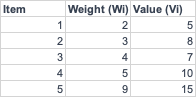

Weight limit, W = 9
Find the maximum combined value that can be achieved by selecting items from the table while respecting the weight limit. Use dynamic programming to determine the optimal subset of items to place in the knapsack to maximize the total value.

### **Solution 8:**

The Knapsack Problem is a classic optimization problem that involves selecting a subset of items from a given set while respecting a weight limit, with the objective of maximizing the total value of the selected items. In the presented problem:

1. Items: You are given a set of five items, each with its weight and value. The table provides this information for each item.

2. Weight Limit (W): There is a constraint on the total weight that can be carried, specified by the weight limit, W. In this case, W is set to 9 units.

3. Objective: The goal is to determine the maximum combined value that can be achieved by selecting a subset of items from the given set, considering both the value and weight of each item.

4. Constraints: The key constraint is that the total weight of the selected items cannot exceed the weight limit, W. This means that you must choose items strategically to maximize the total value while staying within the weight limit.

To solve this problem, dynamic programming is employed. A 2D array (dp) is used to compute the maximum value achievable for different combinations of items and weights, starting from the smallest subproblem and building up to the main problem. The solution keeps track of the selected items that contribute to the maximum value while respecting the weight limit.

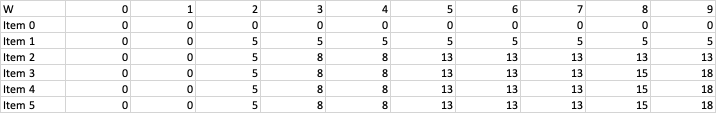

In [6]:
def knapsack(items, W):
    n = len(items)
    dp = [[0] * (W + 1) for _ in range(n + 1)]

    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                dp[i][w] = 0
            elif items[i - 1][0] <= w:
                dp[i][w] = max(items[i - 1][1] + dp[i - 1][w - items[i - 1][0]], dp[i - 1][w])
            else:
                dp[i][w] = dp[i - 1][w]

    selected_items = []
    i, w = n, W
    while i > 0 and w > 0:
        if dp[i][w] != dp[i - 1][w]:
            selected_items.append(i)
            w -= items[i - 1][0]
        i -= 1

    return dp[n][W], selected_items

# Item Table: (weight, value)
items = [(2, 5), (3, 8), (4, 7), (5, 10), (9, 15)]
W = 9

max_value, selected_items = knapsack(items, W)

print("Maximum Combined Value:", max_value)
print("Selected Items:", selected_items)


Maximum Combined Value: 20
Selected Items: [3, 2, 1]




```
function knapsack(items, W):
    n = number of items
    dp = initialize a 2D array of size (n + 1) x (W + 1) to store maximum values
    
    for i from 0 to n:
        for w from 0 to W:
            if i == 0 or w == 0:
                dp[i][w] = 0
            else if items[i-1].weight <= w:
                dp[i][w] = max(items[i-1].value + dp[i-1][w - items[i-1].weight], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    
    selected_items = an empty list
    i = n
    w = W
    while i > 0 and w > 0:
        if dp[i][w] != dp[i-1][w]:
            selected_items.append(i)
            w -= items[i-1].weight
        i -= 1
    
    return dp[n][W], selected_items

```
* items is an array of items, where each item has a weight and a value.
* W is the weight limit.
* dp is a 2D array used for dynamic programming.
* The outer two loops iterate through all items and weight values to calculate the maximum value for different combinations.
* The selected_items list keeps track of the items selected for the knapsack based on the dynamic programming results.
* The function returns the maximum combined value and the selected items that fit within the weight limit.


**Reflection:**

I learned how dynamic programming can be applied to solve combinatorial optimization problems like the 0/1 knapsack problem efficiently. I gained insight into creating and populating a dynamic programming table to keep track of intermediate solutions and subproblems. I learned how to determine the optimal selection of items to maximize the value while staying within the weight constraint of the knapsack. I acquired practical knowledge of implementing the knapsack algorithm in Python, which can be applied to various scenarios involving resource allocation.

### **Problem 9:**

Your friends are venturing into time-series data mining, where they analyze sequences of events occurring over time, such as customer activities on an e-commerce platform. They want to efficiently identify specific patterns or subsequences of events within a larger dataset. The task is to determine whether a shorter sequence S' of m events is a subsequence of a longer sequence S of n events, with the possibility of repeated events.

Sequence S: A long sequence of n events.
Sequence S': A shorter sequence of m events.
Each event in S' can appear multiple times in S.
A sequence S' is considered a subsequence of S if you can remove certain events from S while preserving their order to obtain S'.

**Objective:** Design an efficient algorithm that, given sequences S and S', both potentially containing repeated events, can determine in O(m + n) time whether S' is a subsequence of S. This algorithm should cater to the needs of time-series data mining, where the order of events is crucial for pattern identification.

Your algorithm should efficiently handle these sequences, potentially with multiple occurrences of events, and quickly ascertain whether S' can be found within S while respecting the order of events.

### **Solution 9:**

The problem involves identifying whether a shorter sequence, denoted as S', is a subsequence of a longer sequence, denoted as S. Sequences here represent events or actions that occur over time, such as customer activities on an e-commerce platform.

Key characteristics and goals of the problem:

1. Sequences S and S':
Sequence S is a long sequence of n events, representing a stream of events over time. These events could include actions like "add to cart," "view item," or "checkout."
Sequence S' is a shorter sequence of m events, representing a specific pattern or sequence of interest. It could be a combination of events that you want to identify within the larger sequence.

2. Repetition:
The events in S' can occur multiple times within S. This means that if you find the same event multiple times in S', you need to find corresponding events in S for each occurrence of that event in S'.

3. Subsequence:
A sequence S' is considered a subsequence of S if it can be found within S while preserving the order of events.
For example, if S' is the sequence ["add to cart", "view item", "checkout"], and in S, you have events like ["event1", "add to cart", "event2", "view item", "event3", "checkout", "event4"], then S' is a subsequence of S because you can find these events within S while maintaining their order.

4. Efficiency:
The goal is to design an efficient algorithm that can determine in O(m + n) time whether S' is a subsequence of S, where m is the length of S' and n is the length of S.

This problem is relevant in various domains, including time-series data mining and pattern recognition. It allows your friends to identify specific patterns or sequences of interest within a larger dataset of events, and it's crucial for understanding customer behavior, detecting anomalies, or recognizing specific actions within a time-series dataset. The algorithm provided earlier offers an efficient way to solve this problem while preserving the order of events and considering the possibility of repeated events.

In [8]:
def is_subsequence(S, S_prime):
    n = len(S)
    m = len(S_prime)
    i, j = 0, 0

    while i < n and j < m:
        if S[i] == S_prime[j]:
            j += 1
        i += 1

    return j == m

# Example usage:
S = ["event1", "event2", "event3", "event4", "event5", "event1", "event6"]
S_prime = ["event1", "event2", "event4"]

result = is_subsequence(S, S_prime)

if result:
    print("S' is a subsequence of S.")
else:
    print("S' is not a subsequence of S.")



S' is a subsequence of S.




```
function isSubsequence(S, S'):
    n = length of S
    m = length of S'
    i, j = 0, 0
    
    while i < n and j < m:
        if S[i] == S'[j]:
            j = j + 1
        i = i + 1
    
    return j == m

```

* S is the longer sequence of events.
* S' is the shorter sequence of events that we want to check if it's a subsequence of S.
* i is a pointer for the index in sequence S.
* j is a pointer for the index in sequence S'.

The algorithm iterates through both sequences, moving the pointers i and j forward. If the events at the current positions match, the j pointer advances. The algorithm continues until it finds a complete subsequence (j == m) or exhausts either of the sequences. If j equals the length of S' (m), it means all events in S' were found in S in the correct order, and S' is a subsequence of S.


**Reflection:**

In solving the problem of identifying subsequences in time-series data, I learned about the importance of developing efficient algorithms that can handle complex scenarios. This problem required ensuring that a shorter sequence of events, possibly with repetitions, could be recognized within a longer sequence while preserving the order of events. ChatGPT provided a clear pseudocode that laid the foundation for my code implementation, making the development process much smoother. The algorithm efficiently checks for subsequence membership in O(m + n) time, offering a practical solution for time-series data mining. This experience underscored the significance of well-defined algorithms and how leveraging ChatGPT's guidance and pseudocode simplified the solution development process, helping me overcome the problem's complexities efficiently.

### **Problem 10:**

Prove by induction that in any binary tree, the number of nodes with two children is exactly one less than the number of leaves.

### **Solution 10:**

**Base Case (n = 1):**
In a binary tree with only one node, there are 0 nodes with two children (internal nodes) and 1 leaf. The base case holds as 0 is indeed one less than 1.

**Induction Hypothesis:**
Assume that in any binary tree with 'n' nodes, the number of nodes with two children is one less than the number of leaves.

**Induction Step:**
Now, let's consider a binary tree with 'n + 1' nodes.

1. If the new node added is a leaf node (i.e., has no children), then the number of leaves increases by 1, and the number of nodes with two children remains the same. The induction hypothesis holds.

2. If the new node added has one child, it doesn't affect the count of leaves or nodes with two children.

3. If the new node added has two children, then the number of nodes with two children increases by 1, and the number of leaves remains the same.

In both cases 1 and 3, the relationship between the number of nodes with two children and leaves remains as "one less." Therefore, by the induction step, the hypothesis is proven for 'n + 1.'

Thus, by induction, we can conclude that in any binary tree, the number of nodes with two children is exactly one less than the number of leaves.

In [9]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def count_nodes_with_two_children_and_leaves(root):
    if root is None:
        return 0, 0

    if root.left is None and root.right is None:
        return 0, 1

    left_nodes_with_two_children, left_leaves = count_nodes_with_two_children_and_leaves(root.left)
    right_nodes_with_two_children, right_leaves = count_nodes_with_two_children_and_leaves(root.right)

    total_nodes_with_two_children = left_nodes_with_two_children + right_nodes_with_two_children

    if root.left is not None and root.right is not None:
        total_nodes_with_two_children += 1

    total_leaves = left_leaves + right_leaves

    return total_nodes_with_two_children, total_leaves

# Build a sample binary tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)

# Count nodes with two children and leaves
nodes_with_two_children, leaves = count_nodes_with_two_children_and_leaves(root)

# Check if the statement holds
if nodes_with_two_children == leaves - 1:
    print("The statement holds. Nodes with two children:", nodes_with_two_children, "Leaves:", leaves)
else:
    print("The statement does not hold.")


The statement holds. Nodes with two children: 2 Leaves: 3




```
Function countNodesWithTwoChildrenAndLeaves(node):
    if node is null:
        return 0, 0
    if node has no children:
        return 0, 1
    
    leftNodesWithTwoChildren, leftLeaves = countNodesWithTwoChildrenAndLeaves(node.left)
    rightNodesWithTwoChildren, rightLeaves = countNodesWithTwoChildrenAndLeaves(node.right)

    totalNodesWithTwoChildren = leftNodesWithTwoChildren + rightNodesWithTwoChildren

    if node has two children:
        totalNodesWithTwoChildren = totalNodesWithTwoChildren + 1

    totalLeaves = leftLeaves + rightLeaves

    return totalNodesWithTwoChildren, totalLeaves

# Build a sample binary tree
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)

# Count nodes with two children and leaves
nodesWithTwoChildren, leaves = countNodesWithTwoChildrenAndLeaves(root)

# Check if the statement holds
if nodesWithTwoChildren == leaves - 1:
    Print("The statement holds. Nodes with two children:", nodesWithTwoChildren, "Leaves:", leaves)
else:
    Print("The statement does not hold.")

```



**Reflection:**

The process of solving and understanding the binary tree problem, where we proved that the number of nodes with two children is one less than the number of leaves, was a valuable learning experience. It involved applying mathematical induction to a real-world problem in data structures and algorithms. The recursive nature of the algorithm reinforced my understanding of tree traversal. During this journey, ChatGPT played a pivotal role by providing clear explanations and helping me verify the correctness of my code. It served as an accessible source of guidance and inspiration throughout the problem-solving process. The experience underscored the importance of both theoretical and practical aspects of computer science, enriching my problem-solving skills and enhancing my confidence in tackling complex challenges.